Mini-Projet_Apprentissage Supervisé Linéaire
(M1 IA)

C34645-zahra yeselk boubacar

# Partie 1 : **Régression Linéair**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Charger le dataset
from google.colab import files
files.upload()


Saving insurance.csv to insurance (1).csv


{'insurance (1).csv': b'age,sex,bmi,children,smoker,region,charges\r\n19,female,27.9,0,yes,southwest,16884.924\r\n18,male,33.77,1,no,southeast,1725.5523\r\n28,male,33,3,no,southeast,4449.462\r\n33,male,22.705,0,no,northwest,21984.47061\r\n32,male,28.88,0,no,northwest,3866.8552\r\n31,female,25.74,0,no,southeast,3756.6216\r\n46,female,33.44,1,no,southeast,8240.5896\r\n37,female,27.74,3,no,northwest,7281.5056\r\n37,male,29.83,2,no,northeast,6406.4107\r\n60,female,25.84,0,no,northwest,28923.13692\r\n25,male,26.22,0,no,northeast,2721.3208\r\n62,female,26.29,0,yes,southeast,27808.7251\r\n23,male,34.4,0,no,southwest,1826.843\r\n56,female,39.82,0,no,southeast,11090.7178\r\n27,male,42.13,0,yes,southeast,39611.7577\r\n19,male,24.6,1,no,southwest,1837.237\r\n52,female,30.78,1,no,northeast,10797.3362\r\n23,male,23.845,0,no,northeast,2395.17155\r\n56,male,40.3,0,no,southwest,10602.385\r\n30,male,35.3,0,yes,southwest,36837.467\r\n60,female,36.005,0,no,northeast,13228.84695\r\n30,female,32.4,1,no,sou

In [12]:
df = pd.read_csv("insurance.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
# Valeurs manquantes
df.isna().sum()


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [15]:
X = df.drop("charges", axis=1)
y = df["charges"]


Analyser les corrélations via une matrice de chaleur (Heatmap).


* On calcule la corrélation entre variables numériques
* Une heatmap montre quelles variables sont fortement liées

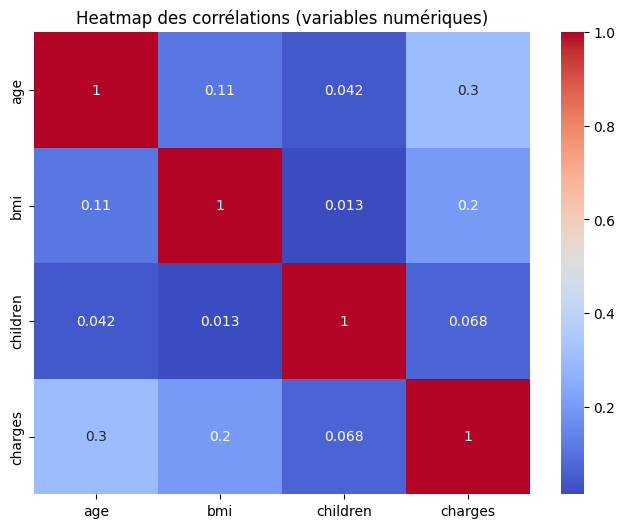

In [16]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
corr = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Heatmap des corrélations (variables numériques)")
plt.show()


Formaliser le modèle :    
 y = β0 + Σβi xi + ε


*    y :charges
*  xi :age, bmi, children, sex, smoker, region...
*   𝛽βi : coefficients appris
*   ε:erreur





In [17]:
#Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [18]:
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
num_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), cat_cols),
        ("num", "passthrough", num_cols)
    ]
)

model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("regressor", LinearRegression())
])


Entraînement du modèle

In [19]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker', 'region']),
                                                 ('num', 'passthrough',
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('regressor', LinearRegression())])

**Évaluation avec MSE et R²**



*   MSE : plus petit = meilleur
*   R² : proche de 1 = bon, proche de 0 = mauvais



In [20]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE =", mse)
print("R²  =", r2)


MSE = 33596915.85136148
R²  = 0.7835929767120722


Interpréter l’importance des variables via βi


In [21]:
# Récupérer les noms des features après encodage
ohe = model.named_steps["preprocess"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(cat_cols)

feature_names = np.concatenate([cat_feature_names, num_cols])

coeffs = model.named_steps["regressor"].coef_

coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coeffs
}).sort_values(by="Coefficient", ascending=False)

coef_df.head(10)


,Feature,Coefficient
1,smoker_yes,23651.128856
7,children,425.278784
6,bmi,337.092552
5,age,256.975706
0,sex_male,-18.591692
2,region_northwest,-370.677326
3,region_southeast,-657.864297
4,region_southwest,-809.799354


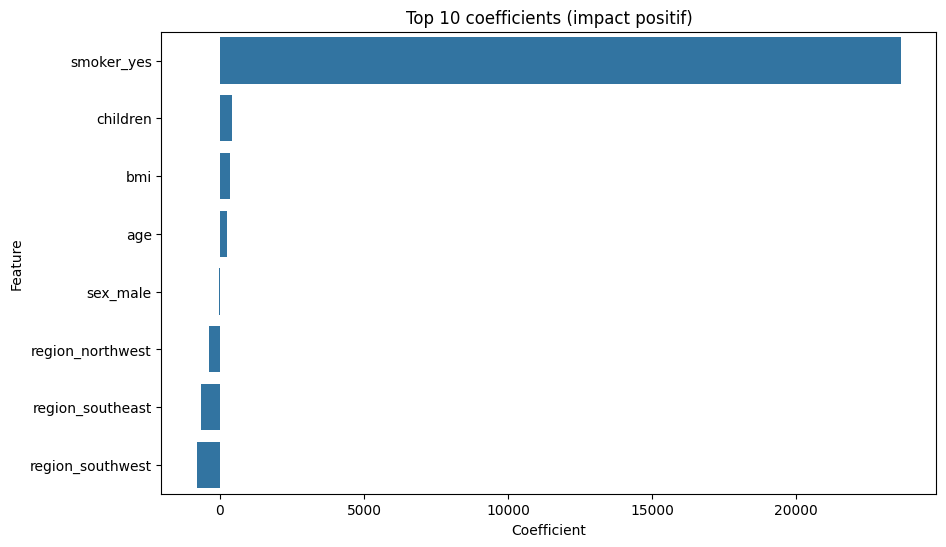

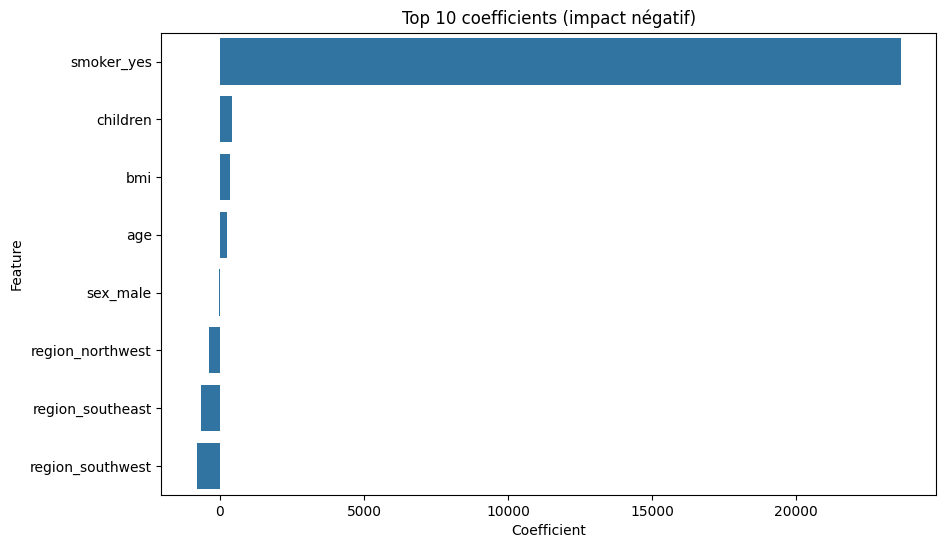

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(data=coef_df.head(10), x="Coefficient", y="Feature")
plt.title("Top 10 coefficients (impact positif)")
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(data=coef_df.tail(10), x="Coefficient", y="Feature")
plt.title("Top 10 coefficients (impact négatif)")
plt.show()


L’analyse des coefficients du modèle de régression linéaire montre que la variable la plus influente est le statut de fumeur (smoker_yes), qui augmente fortement les coûts médicaux.

# Partie 2 : **Régression Logistique**

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score
)


In [25]:
#Chargement et préparation des données
iris = load_iris()

X = iris.data          # variables d’entrée
y = iris.target        # classes (0,1,2)


In [26]:
y_binary = (y == 0).astype(int)  # 1 = setosa, 0 = autres


Train / Test **split**

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42
)


**Normalisation des variables**

In [29]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


 Modéliser la probabilité d’appartenance à l’aide de la fonction sigmoïde ..

In [30]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [31]:
y_pred = model.predict(X_test_scaled)


**Matrice de confusion**

In [32]:
cm = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :\n", cm)


Matrice de confusion :
 [[20  0]
 [ 0 10]]


**Métriques d’évaluation**

Calcule de l’Accuracy, la Précision et le Rappel (Recall)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy =", accuracy)


Accuracy = 1.0


In [34]:
precision = precision_score(y_test, y_pred)
print("Precision =", precision)


Precision = 1.0


In [35]:
recall = recall_score(y_test, y_pred)
print("Recall =", recall)


Recall = 1.0
